# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Social Media Viral Dataset](https://www.kaggle.com/datasets/aliiihussain/social-media-viral-content-and-engagement-metrics)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

/kaggle/input/social-media-viral-content-and-engagement-metrics/social_media_viral_content_dataset.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('social_media_viral_content_dataset.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1


## Shape of our dataset

In [4]:
df.shape

(2000, 15)

## List out all columns

In [5]:
df.columns

Index(['post_id', 'platform', 'content_type', 'topic', 'language', 'region',
       'post_datetime', 'hashtags', 'views', 'likes', 'comments', 'shares',
       'engagement_rate', 'sentiment_score', 'is_viral'],
      dtype='object')

## Datatype of each columns

In [6]:
df.dtypes

post_id             object
platform            object
content_type        object
topic               object
language            object
region              object
post_datetime       object
hashtags            object
views                int64
likes                int64
comments             int64
shares               int64
engagement_rate    float64
sentiment_score    float64
is_viral             int64
dtype: object

## Information of all Columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


## Check Null Value

In [8]:
df.isnull().sum()

post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
sentiment_score    0
is_viral           0
dtype: int64

## Check Dupicate Value

In [9]:
df.duplicated().sum()

np.int64(0)

## Summary

In [10]:
df.describe()

,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.284860e+06,245329.244000,24786.929000,49936.981500,0.157852,-0.000566,0.699000
std,3.246193e+06,145032.423582,14433.288364,29012.818697,0.535457,0.574911,0.458807
min,4.380000e+03,292.000000,14.000000,127.000000,0.035700,-1.000000,0.000000
25%,1.652742e+06,118903.750000,12337.750000,25698.750000,0.057975,-0.507000,0.000000
50%,3.469408e+06,239831.000000,24519.500000,50212.000000,0.084500,0.001000,1.000000
75%,6.348078e+06,372323.500000,37116.250000,75433.000000,0.142525,0.495250,1.000000
max,1.437179e+07,499983.000000,49989.000000,99977.000000,12.573200,0.999000,1.000000


# EDA

In [11]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

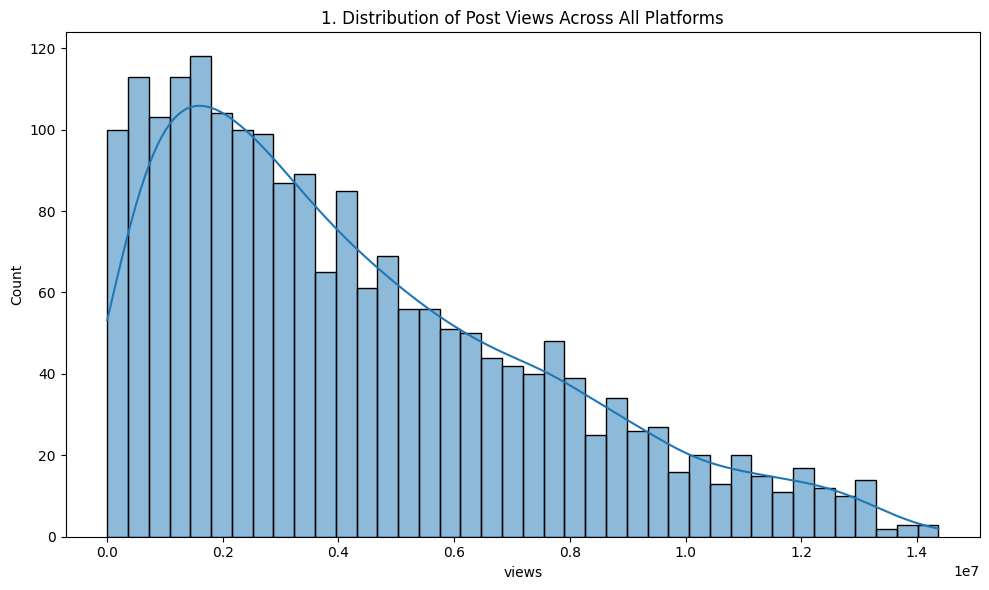

In [12]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['views'], bins=40, kde=True)
plt.title(f'{plot_no}. Distribution of Post Views Across All Platforms')
show_fig()
plot_no += 1


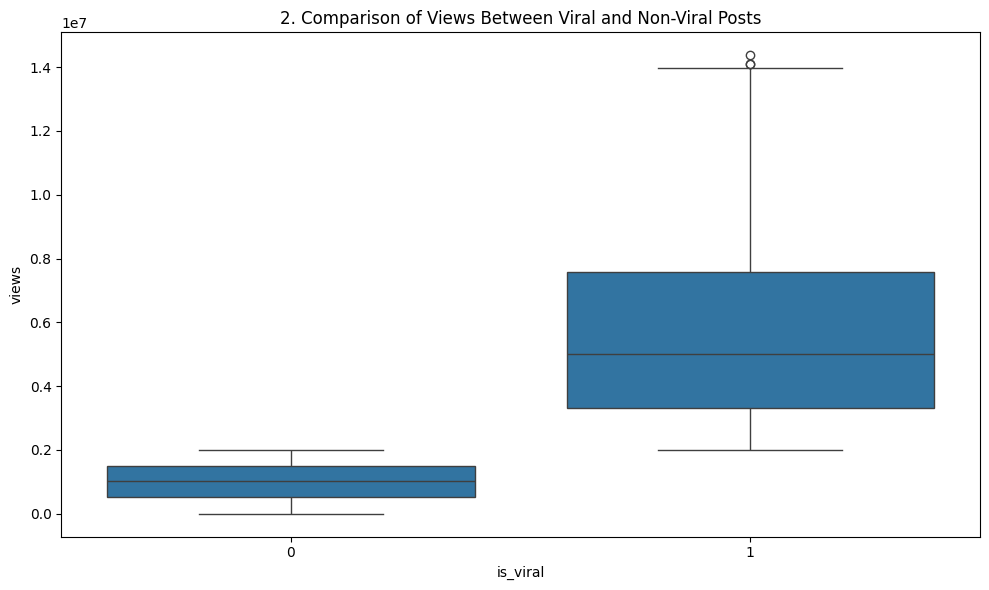

In [13]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='is_viral', y='views', data=df)
plt.title(f'{plot_no}. Comparison of Views Between Viral and Non-Viral Posts')
show_fig()
plot_no += 1


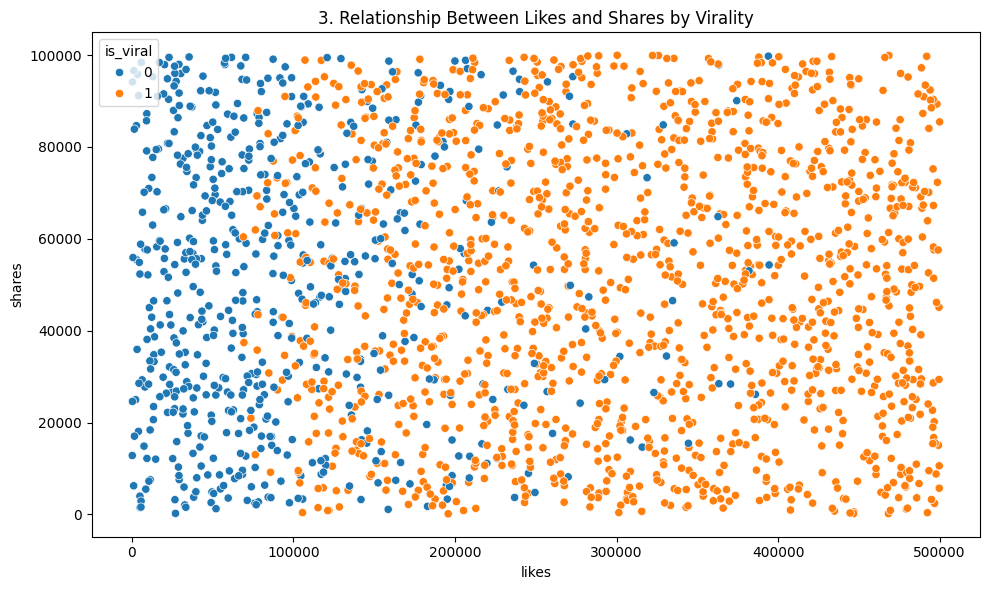

In [14]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='likes', y='shares', hue='is_viral', data=df)
plt.title(f'{plot_no}. Relationship Between Likes and Shares by Virality')
show_fig()
plot_no += 1


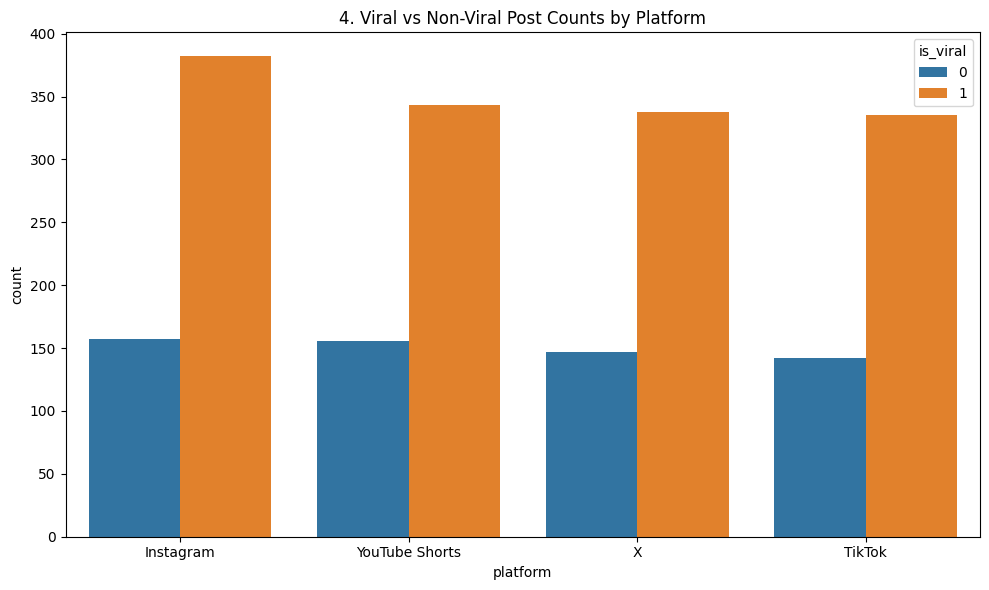

In [15]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='platform', hue='is_viral', data=df)
plt.title(f'{plot_no}. Viral vs Non-Viral Post Counts by Platform')
show_fig()
plot_no += 1


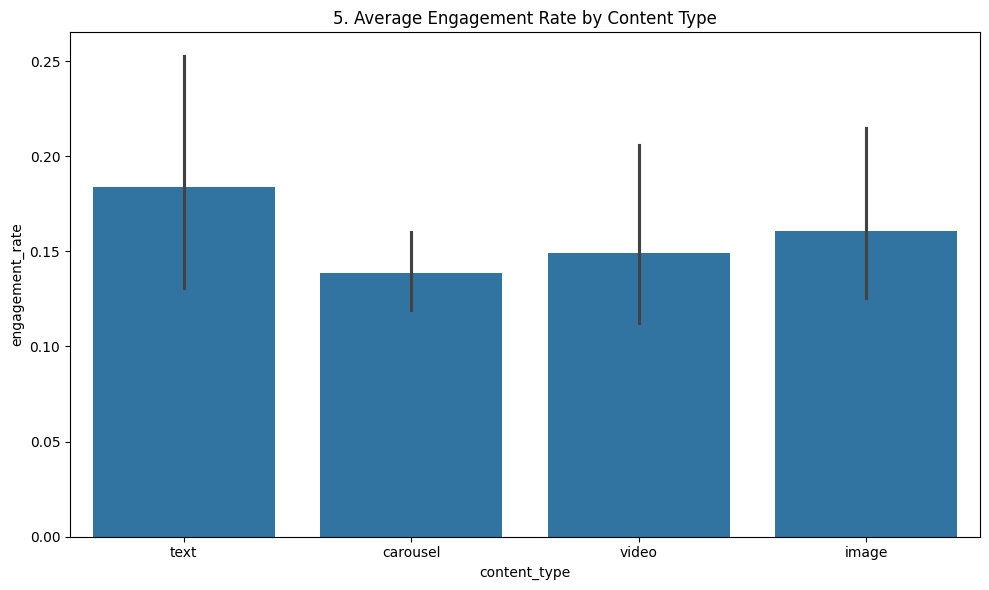

In [16]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='content_type', y='engagement_rate', data=df)
plt.title(f'{plot_no}. Average Engagement Rate by Content Type')
show_fig()
plot_no += 1


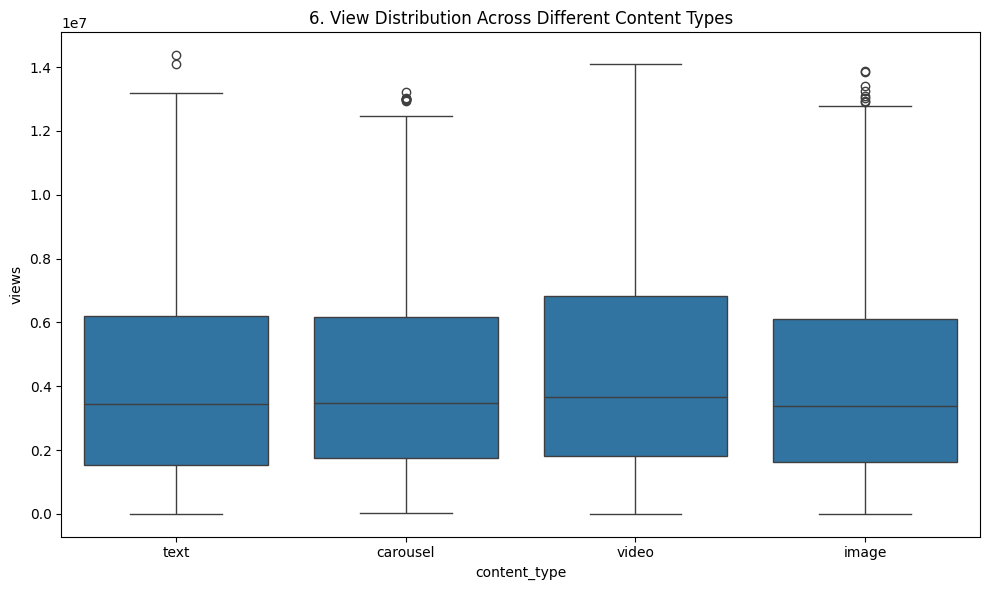

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='content_type', y='views', data=df)
plt.title(f'{plot_no}. View Distribution Across Different Content Types')
show_fig()
plot_no += 1


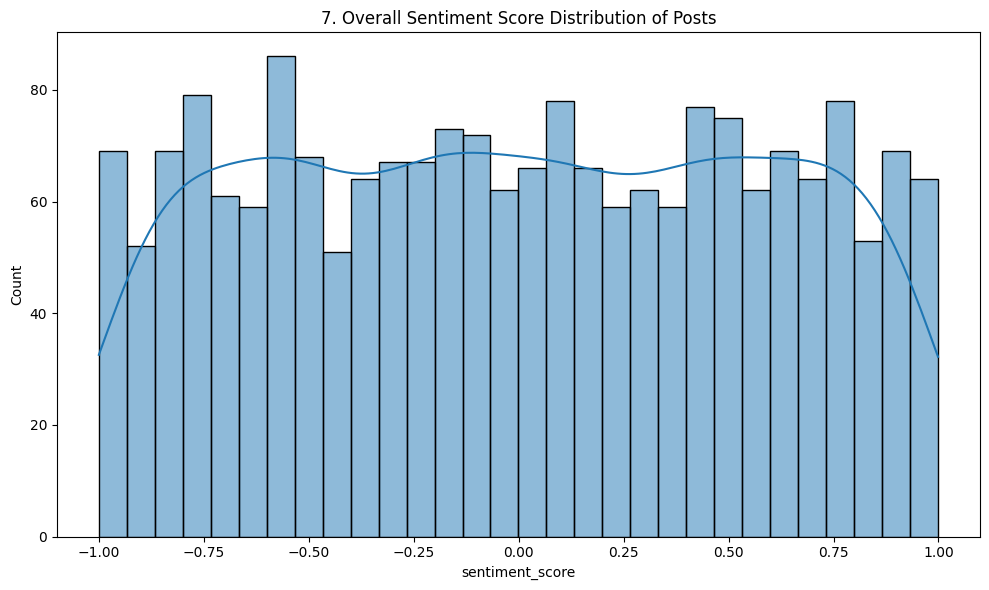

In [18]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title(f'{plot_no}. Overall Sentiment Score Distribution of Posts')
show_fig()
plot_no += 1


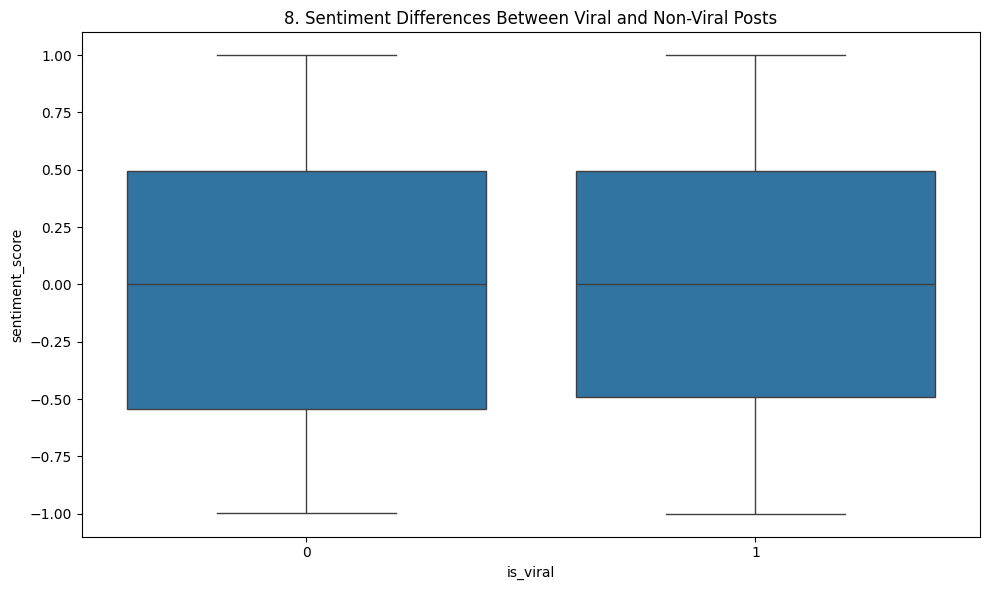

In [19]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='is_viral', y='sentiment_score', data=df)
plt.title(f'{plot_no}. Sentiment Differences Between Viral and Non-Viral Posts')
show_fig()
plot_no += 1


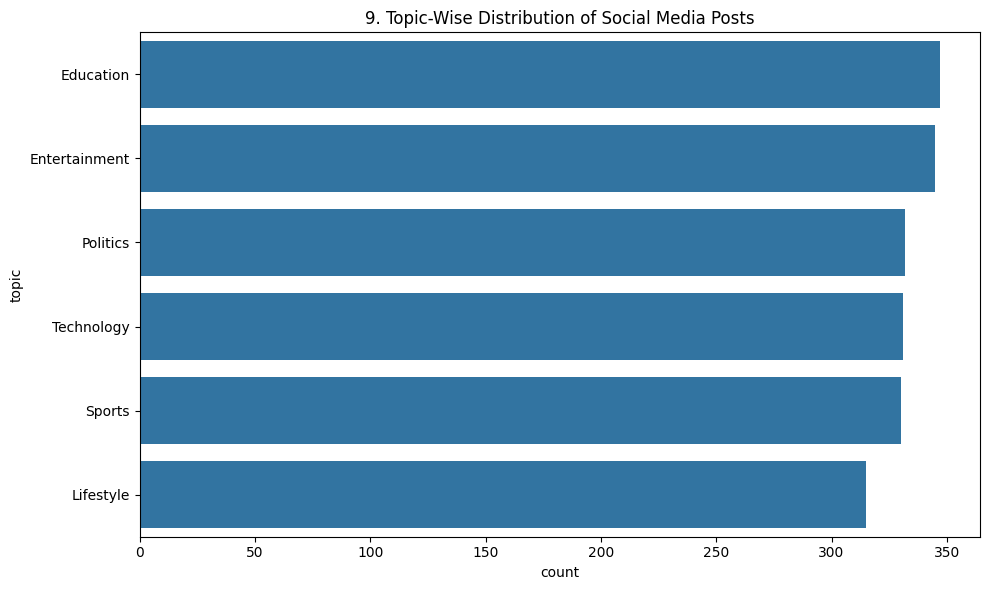

In [20]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y='topic', data=df, order=df['topic'].value_counts().index)
plt.title(f'{plot_no}. Topic-Wise Distribution of Social Media Posts')
show_fig()
plot_no += 1


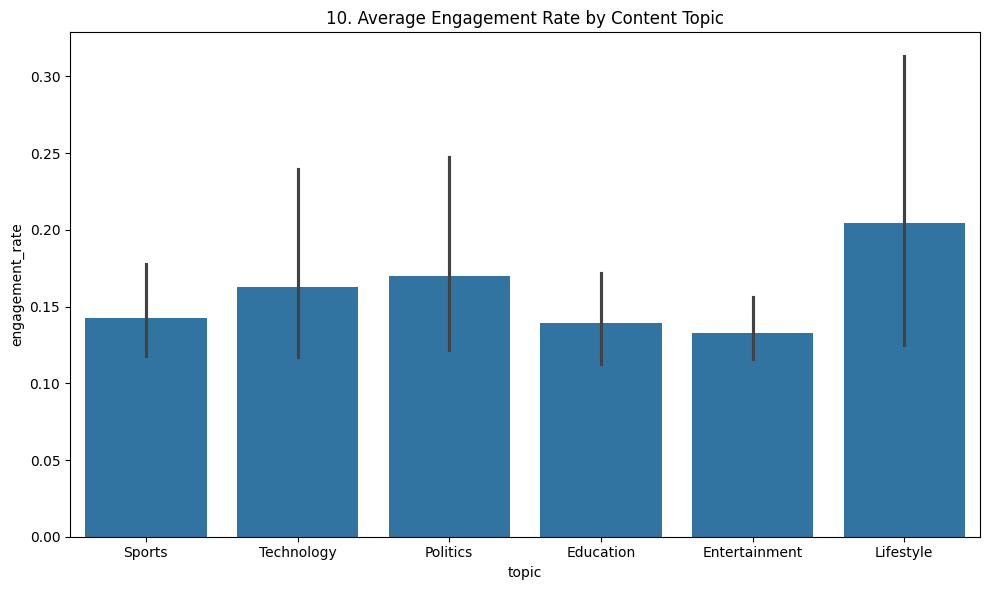

In [21]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='topic', y='engagement_rate', data=df)
plt.title(f'{plot_no}. Average Engagement Rate by Content Topic')
show_fig()
plot_no += 1


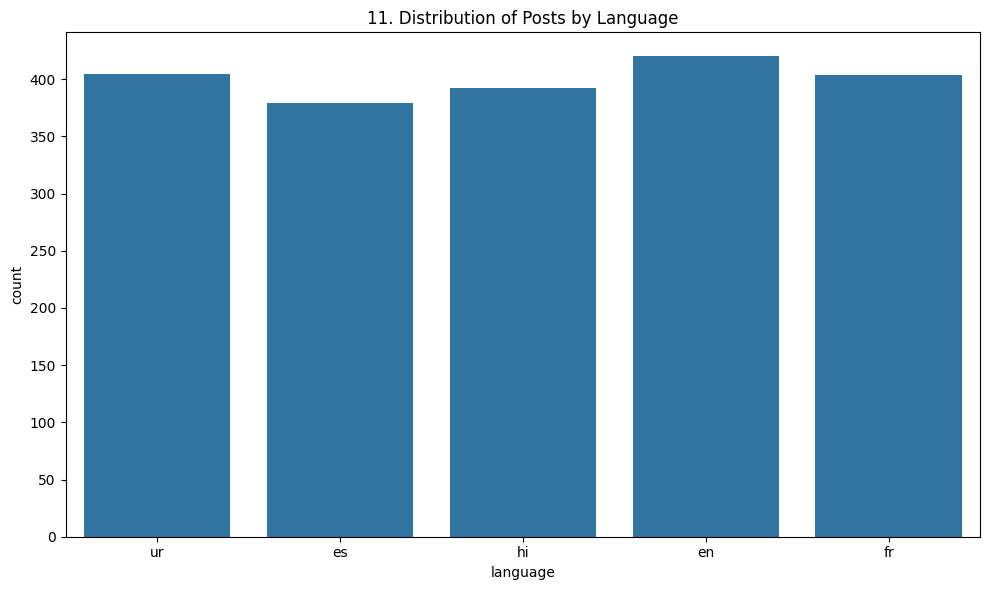

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='language', data=df)
plt.title(f'{plot_no}. Distribution of Posts by Language')
show_fig()
plot_no += 1


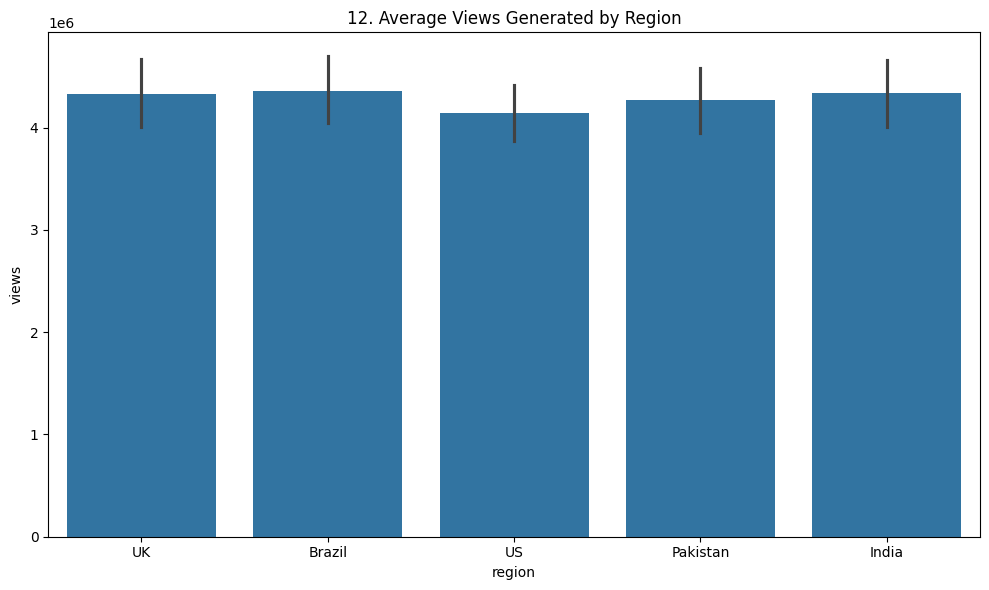

In [23]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='region', y='views', data=df)
plt.title(f'{plot_no}. Average Views Generated by Region')
show_fig()
plot_no += 1


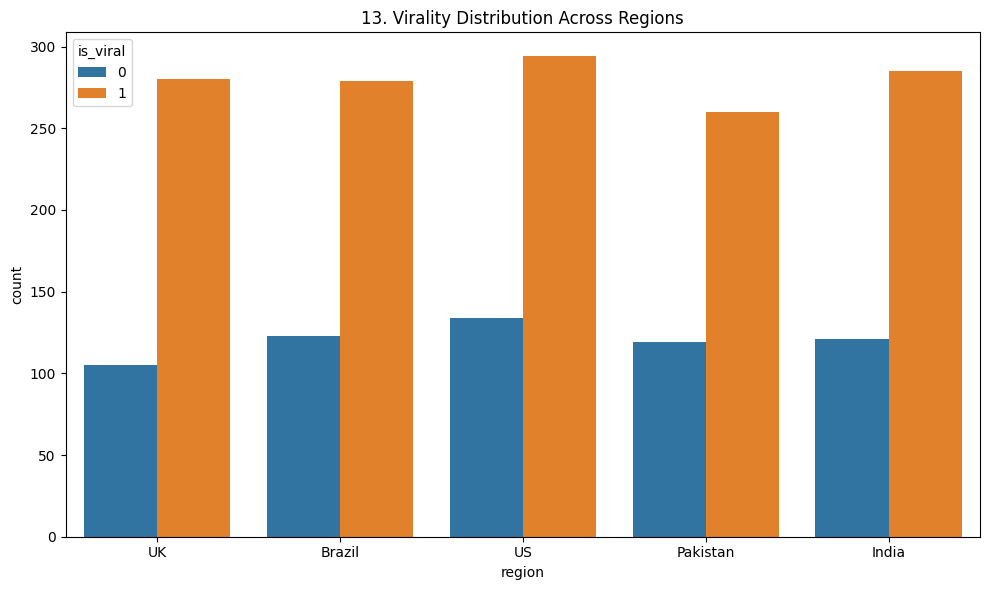

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='region', hue='is_viral', data=df)
plt.title(f'{plot_no}. Virality Distribution Across Regions')
show_fig()
plot_no += 1


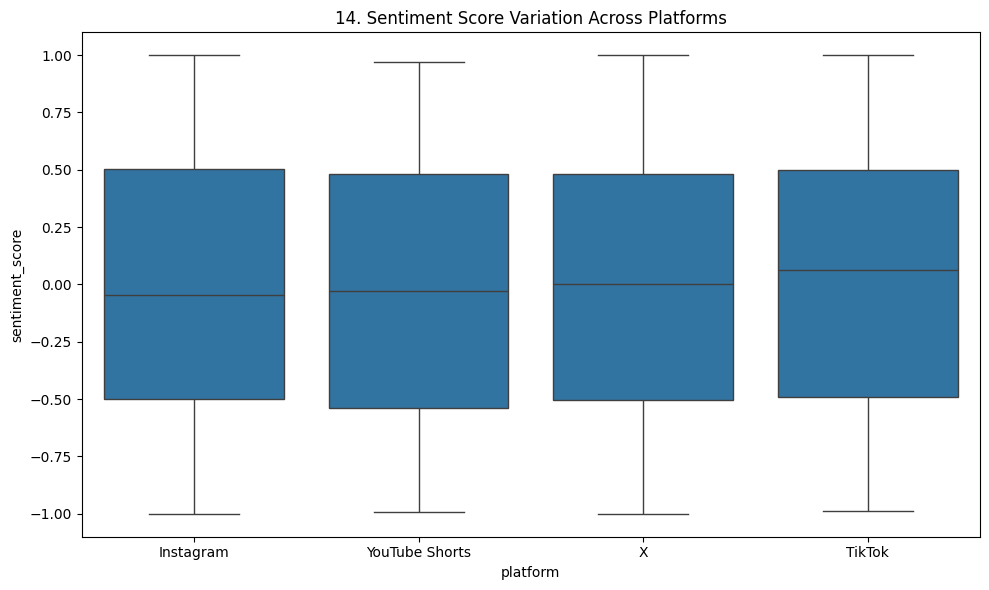

In [25]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='sentiment_score', data=df)
plt.title(f'{plot_no}. Sentiment Score Variation Across Platforms')
show_fig()
plot_no += 1


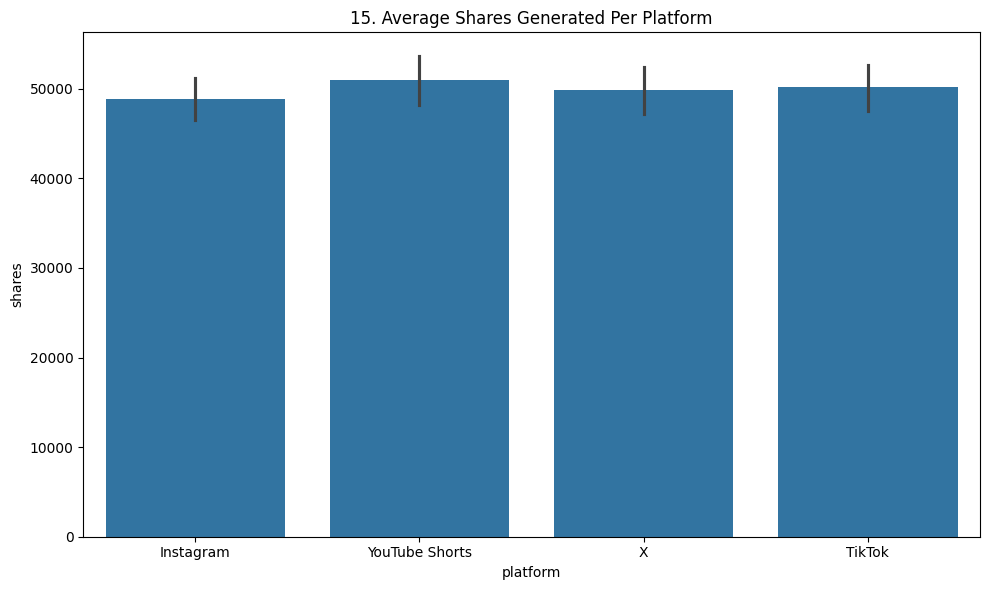

In [26]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='platform', y='shares', data=df)
plt.title(f'{plot_no}. Average Shares Generated Per Platform')
show_fig()
plot_no += 1


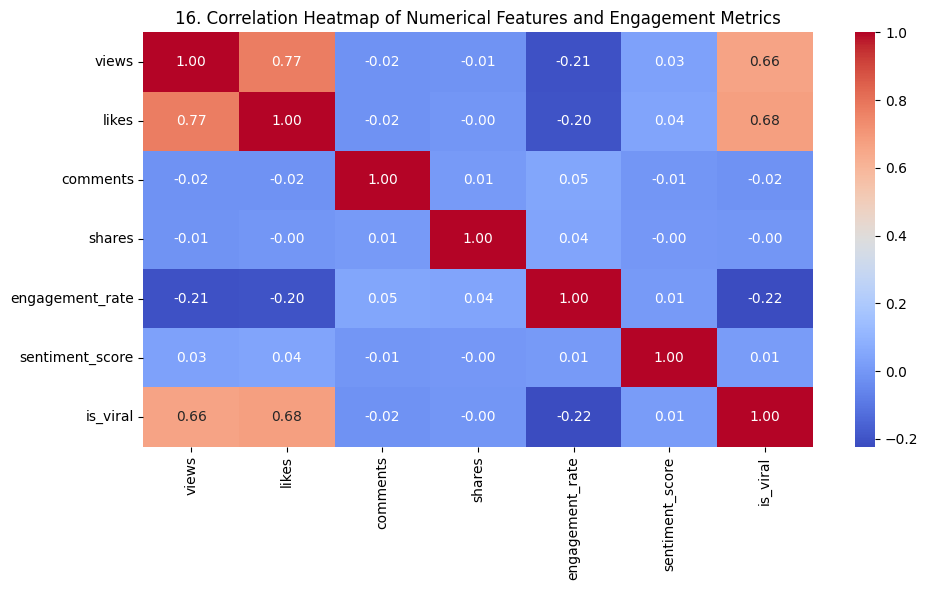

In [27]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'{plot_no}. Correlation Heatmap of Numerical Features and Engagement Metrics')
show_fig()
plot_no += 1


# Model Training

## Feature Select

In [28]:
X = df[['views', 'likes', 'comments', 'shares', 'engagement_rate', 'sentiment_score']]
y = df['is_viral']

## Split data into train and test sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Scale features

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression model

In [31]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Predict on test data

In [32]:
y_pred = model.predict(X_test_scaled)

## Calculate and print accuracy

In [33]:
acc = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {acc:.4f}')

Logistic Regression Accuracy: 0.9875


## Plot confusion matrix

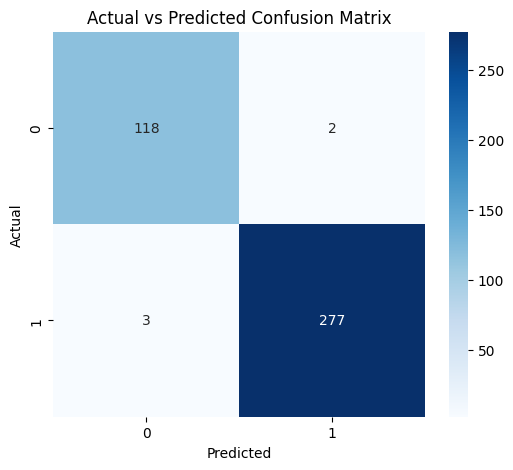

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Confusion Matrix')
plt.show()